In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [129]:
data=pd.read_csv("fruit_dataset.csv")

In [130]:
data.shape
#data.drop(columns=['color_score'],inplace=True)

(59, 6)

In [131]:
print(data)

    fruit_label fruit_name  mass  width  height  color_score
0             1      apple   192    8.4     7.3         0.55
1             1      apple   180    8.0     6.8         0.59
2             1      apple   176    7.4     7.2         0.60
3             2   mandarin    86    6.2     4.7         0.80
4             2   mandarin    84    6.0     4.6         0.79
5             2   mandarin    80    5.8     4.3         0.77
6             2   mandarin    80    5.9     4.3         0.81
7             2   mandarin    76    5.8     4.0         0.81
8             1      apple   178    7.1     7.8         0.92
9             1      apple   172    7.4     7.0         0.89
10            1      apple   166    6.9     7.3         0.93
11            1      apple   172    7.1     7.6         0.92
12            1      apple   154    7.0     7.1         0.88
13            1      apple   164    7.3     7.7         0.70
14            1      apple   152    7.6     7.3         0.69
15            1      app

In [132]:
x=data.iloc[: ,2:]
y=data.iloc[: ,0:1]
s=MinMaxScaler().set_output(transform="pandas")
x=s.fit_transform(x)

In [133]:
print(x)

        mass     width    height  color_score
0   0.405594  0.684211  0.507692     0.000000
1   0.363636  0.578947  0.430769     0.105263
2   0.349650  0.421053  0.492308     0.131579
3   0.034965  0.105263  0.107692     0.657895
4   0.027972  0.052632  0.092308     0.631579
5   0.013986  0.000000  0.046154     0.578947
6   0.013986  0.026316  0.046154     0.684211
7   0.000000  0.000000  0.000000     0.684211
8   0.356643  0.342105  0.584615     0.973684
9   0.335664  0.421053  0.461538     0.894737
10  0.314685  0.289474  0.507692     1.000000
11  0.335664  0.342105  0.553846     0.973684
12  0.272727  0.315789  0.476923     0.868421
13  0.307692  0.394737  0.569231     0.394737
14  0.265734  0.473684  0.507692     0.368421
15  0.279720  0.500000  0.476923     0.368421
16  0.279720  0.473684  0.538462     0.315789
17  0.321678  0.447368  0.553846     0.473684
18  0.300699  0.447368  0.476923     0.736842
19  0.300699  0.421053  0.492308     0.789474
20  0.293706  0.447368  0.538462  

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1234,test_size=0.20,shuffle=True)

In [135]:
def knn(x_train, x_test_sample, y_train, k):
    x_test_sample = np.array(x_test_sample)
    distance = []
    for i in range(len(x_train)):
        x_train_sample = np.array(x_train.iloc[i])
        dist = 0
        label = y_train.iloc[i, 0]  
        for j in range(len(x_train_sample)):
            dist += (x_train_sample[j] - x_test_sample[j]) ** 2
        dist = dist ** 0.5
        distance.append((dist, label))
    distance.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distance[:k]]
    return k_nearest_labels

def fun(k_nearest_labels):
    label_counts = {}
    for label in k_nearest_labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    
    print(label_counts)
    
    most_common_label = None
    max_count = 0
    for label, count in label_counts.items():
        if count >= max_count:
            max_count = count
            most_common_label = label
    return most_common_label


k = 5
tc = len(x_test)
tcor = 0
for ind in range(len(x_test)):
    x_test_sample = np.array(x_test.iloc[ind])
    print("X_test_sample : ")
    print(x_test_sample)
    
    
    knns = knn(x_train, x_test_sample, y_train, k)
    
    
    predicted_label = fun(knns)
    
   
    actual_label = y_test.iloc[ind, 0]
    print("Actual Label : ", actual_label)
    print("Predicted Label : ", predicted_label)
    
    
    if actual_label == predicted_label:
        tcor += 1
    print('_____________________________________________________________________')


acc = tcor / tc
print(f"Accuracy of the model is : {acc * 100: .4f}")


X_test_sample : 
[0.29370629 0.31578947 0.52307692 0.68421053]
{3: 5}
Actual Label :  3
Predicted Label :  3
_____________________________________________________________________
X_test_sample : 
[0.43356643 0.39473684 1.         0.44736842]
{4: 4, 3: 1}
Actual Label :  4
Predicted Label :  4
_____________________________________________________________________
X_test_sample : 
[0.35664336 0.34210526 0.58461538 0.97368421]
{1: 5}
Actual Label :  1
Predicted Label :  1
_____________________________________________________________________
X_test_sample : 
[0.22377622 0.39473684 0.47692308 0.84210526]
{1: 5}
Actual Label :  1
Predicted Label :  1
_____________________________________________________________________
X_test_sample : 
[0.01398601 0.02631579 0.04615385 0.68421053]
{2: 4, 3: 1}
Actual Label :  2
Predicted Label :  2
_____________________________________________________________________
X_test_sample : 
[0.13986014 0.05263158 0.53846154 0.44736842]
{4: 5}
Actual Label :  4
Predi

In [136]:
tc = len(x_train)
tcor = 0
for ind in range(len(x_train)):
    x_test_sample = np.array(x_train.iloc[ind])
    print("X_test_sample : ")
    print(x_test_sample)
    
    
    knns = knn(x_train, x_test_sample , y_train, k)
    
    
    predicted_label = fun(knns)
    
   
    actual_label = y_train.iloc[ind, 0]
    print("Actual Label : ", actual_label)
    print("Predicted Label : ", predicted_label)
    
    
    if actual_label == predicted_label:
        tcor += 1
    print('_____________________________________________________________________')


acc = tcor / tc
print(f"Accuracy of the model is : {acc * 100: .4f}")



X_test_sample : 
[0.02797203 0.05263158 0.09230769 0.63157895]
{2: 4, 3: 1}
Actual Label :  2
Predicted Label :  2
_____________________________________________________________________
X_test_sample : 
[0.29370629 0.44736842 0.53846154 0.81578947]
{1: 5}
Actual Label :  1
Predicted Label :  1
_____________________________________________________________________
X_test_sample : 
[0.38461538 0.36842105 0.8        0.44736842]
{4: 4, 3: 1}
Actual Label :  4
Predicted Label :  4
_____________________________________________________________________
X_test_sample : 
[0.44755245 0.44736842 0.8        0.57894737]
{3: 2, 4: 3}
Actual Label :  3
Predicted Label :  4
_____________________________________________________________________
X_test_sample : 
[0.27972028 0.42105263 0.52307692 0.76315789]
{1: 3, 3: 2}
Actual Label :  1
Predicted Label :  1
_____________________________________________________________________
X_test_sample : 
[0.18881119 0.05263158 0.64615385 0.42105263]
{4: 5}
Actual Labe

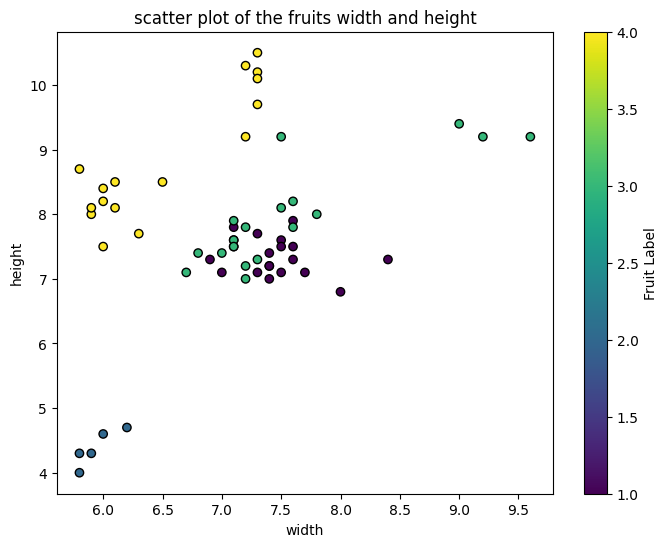

In [138]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(data['width'],data['height'],c=data['fruit_label'],cmap='viridis',edgecolor='k')
plt.colorbar(scatter,label='Fruit Label')
plt.xlabel('width')
plt.ylabel('height')
plt.title('scatter plot of the fruits width and height')
plt.grid=(True)

In [139]:
# Example training data
x_train = pd.DataFrame({
    "mass": [150, 200, 250, 300, 350],
    "width": [5.5, 6.0, 6.5, 7.0, 7.5],
    "height": [8.0, 9.0, 10.0, 11.0, 12.0],
    "color_score": [0.8, 0.9, 0.85, 0.88, 0.95]
})
y_train = pd.DataFrame({"Label": ["Apple", "Apple", "Banana", "Banana", "Orange"]})

# Define new data point to classify
new_data_point = [275, 6.2, 10.5, 0.87]  # Features: mass, width, height, color_score

# Number of nearest neighbors to consider
k = 3

# Call knn to get the k nearest neighbors' labels
k_nearest_labels = knn(x_train, new_data_point, y_train, k)

# Call fun to determine the most common label among the nearest neighbors
predicted_label = fun(k_nearest_labels)

# Print the predicted label
print(f"Predicted Label for the new data point {new_data_point}: {predicted_label}")


{'Banana': 2, 'Apple': 1}
Predicted Label for the new data point [275, 6.2, 10.5, 0.87]: Banana
